In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data into dataframes
fa20_demographics = pd.read_csv("data_demographics/cs101-fa20-demographics.csv")
sp21_demographics = pd.read_csv("data_demographics/cs101-sp21-demographics.csv")
fa21_demographics = pd.read_csv("data_demographics/cs101-fa21-demographics.csv")

#Header arg needed to ensure that MultiIndexed Columns are preserved
fa20_mdh = pd.read_csv("data_mdh/cs101fa20-mdh-processed-any-teacher.csv", header=[0,2])
sp21_mdh = pd.read_csv("data_mdh/cs101sp21-mdh-processed-any-teacher.csv", header=[0,2])
fa21_mdh = pd.read_csv("data_mdh/cs101fa21-mdh-processed-any-teacher.csv", header=[0,2])

In [3]:
#remove multi dimensions from mdh dataframes

fa20_mdh.columns = fa20_mdh.columns.to_flat_index()
fa20_mdh.columns = ['_'.join(column) for column in fa20_mdh.columns]

fa21_mdh.columns = fa21_mdh.columns.to_flat_index()
fa21_mdh.columns = ['_'.join(column) for column in fa21_mdh.columns]

sp21_mdh.columns = sp21_mdh.columns.to_flat_index()
sp21_mdh.columns = ['_'.join(column) for column in sp21_mdh.columns]

In [4]:
#Make id column names the same and merge datasets on anon ID

fa20_mdh = fa20_mdh.rename(columns={"MDH Info_anonStudent": "anonid"})
fa20_merged = pd.merge(fa20_demographics, fa20_mdh, how='inner', on = 'anonid')

fa21_mdh = fa21_mdh.rename(columns={"MDH Info_anonStudent": "anonid"})
fa21_merged = pd.merge(fa21_demographics, fa21_mdh, how='inner', on = 'anonid')

sp21_mdh = sp21_mdh.rename(columns={"MDH Info_anonStudent": "anonid"})
sp21_merged = pd.merge(sp21_demographics, sp21_mdh, how='inner', on = 'anonid')


In [5]:
#see males versus females in each semester

gender_fa20 = fa20_demographics.groupby("Gender Anon")["anonid"].count()

gender_fa21 = fa21_demographics.groupby("Gender Anon")["anonid"].count()

gender_sp21 = sp21_demographics.groupby("Gender Anon")["anonid"].count()

print(gender_fa20,"\n")
print(gender_fa21,"\n")
print(gender_sp21)

Gender Anon
man      75
woman    73
Name: anonid, dtype: int64 

Gender Anon
man      64
woman    94
Name: anonid, dtype: int64 

Gender Anon
man      47
woman    93
Name: anonid, dtype: int64


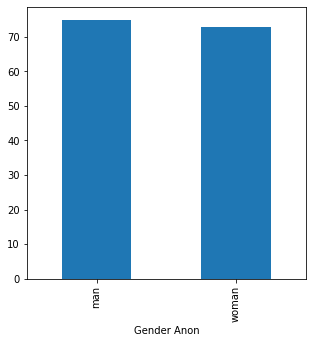

In [6]:
#Fall 2020 gender distribution

gender_fa20_plot = gender_fa20.plot.bar(y='Gender Anon', figsize=(5, 5))

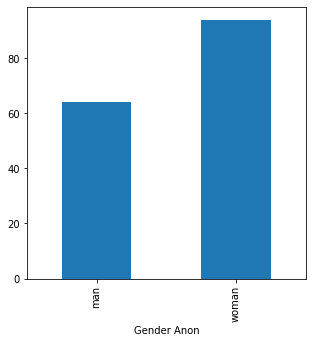

In [7]:
#Fall 2021 gender distribution

gender_fa21_plot = gender_fa21.plot.bar(y='Gender Anon', figsize=(5, 5))

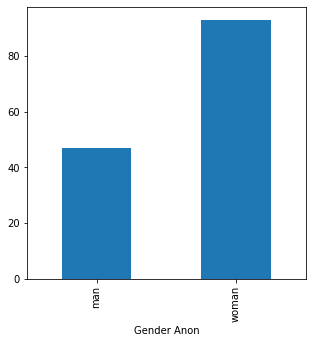

In [8]:
#Spring 2021 gender distribution

gender_sp21_plot = gender_sp21.plot.bar(y='Gender Anon', figsize=(5, 5))

In [9]:
feedback_m_fa20 = fa20_merged[fa20_merged["Gender Anon"] == "man"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()
feedback_w_fa20 = fa20_merged[fa20_merged["Gender Anon"] == "woman"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()

In [10]:
m_fa20_values = feedback_m_fa20.values.tolist()
w_fa20_values = feedback_w_fa20.values.tolist()

print(m_fa20_values, w_fa20_values)

[71, 1, 5, 31, 169] [47, 2, 4, 23, 191]


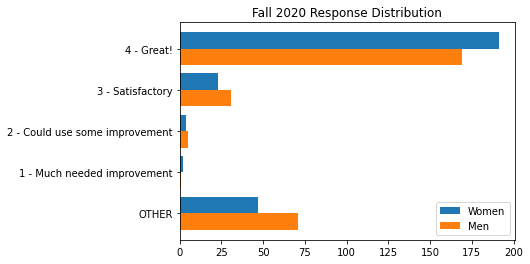

In [11]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

plt.barh(y_axis + 0.2, w_fa20_values, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa20_values, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Fall 2020 Response Distribution")

plt.show()

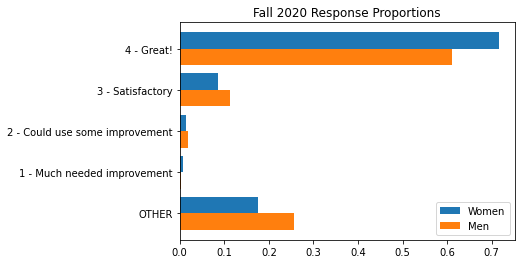

In [12]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

w_fa20_tot = sum(w_fa20_values)
m_fa20_tot = sum(m_fa20_values)

w_fa20_props = [x/w_fa20_tot for x in w_fa20_values]
m_fa20_props = [x/m_fa20_tot for x in m_fa20_values]

plt.barh(y_axis + 0.2, w_fa20_props, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa20_props, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Fall 2020 Response Proportions")

plt.show()

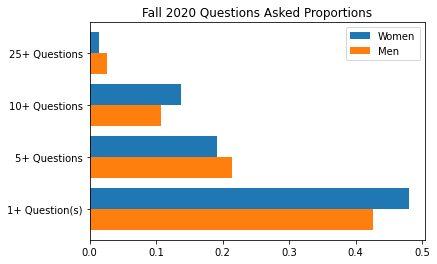

In [13]:
w_fa20_qs = {"1+ Question(s)" : 0, "5+ Questions" : 0, "10+ Questions" : 0, "25+ Questions" : 0}
m_fa20_qs = w_fa20_qs.copy()

all_fa20_qs = {"woman":w_fa20_qs, "man":m_fa20_qs}

fa20_anonids_counts = fa20_merged.groupby("anonid").count()

for anonID in fa20_anonids_counts.index:
    numQs = fa20_anonids_counts.at[anonID, "Gender Anon"]
    gender = fa20_demographics.set_index("anonid").at[anonID, "Gender Anon"]
    if gender not in ["man", "woman"]:
        continue
    prop = 1/gender_fa20[gender]
    
    all_fa20_qs[gender]["1+ Question(s)"] += prop
    
    if numQs >= 5:
        all_fa20_qs[gender]["5+ Questions"] += prop
    
    if numQs >= 10:
        all_fa20_qs[gender]["10+ Questions"] += prop
        
    if numQs >= 25:
        all_fa20_qs[gender]["25+ Questions"] += prop

y_axis = np.arange(len(w_fa20_qs))

plt.barh(y_axis + 0.2, w_fa20_qs.values(), height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa20_qs.values(), height=0.4,  label = "Men")

plt.yticks(y_axis, m_fa20_qs.keys())

plt.legend()

plt.title("Fall 2020 Questions Asked Proportions")

plt.show()

In [14]:
feedback_m_sp21 = sp21_merged[sp21_merged["Gender Anon"] == "man"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()
feedback_w_sp21 = sp21_merged[sp21_merged["Gender Anon"] == "woman"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()

In [15]:
#So response by a man gave "1 - Much needed improvement", so we must manually add that in as it's not counted by the above methods
m_sp21_values = feedback_m_sp21.values.tolist()
m_sp21_values.insert(1,0)

w_sp21_values = feedback_w_sp21.values.tolist()

print(m_sp21_values, w_sp21_values)

[11, 0, 6, 11, 106] [64, 2, 16, 52, 434]


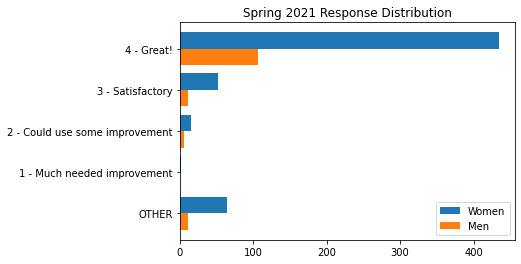

In [16]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

plt.barh(y_axis + 0.2, w_sp21_values, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_sp21_values, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Spring 2021 Response Distribution")

plt.show()

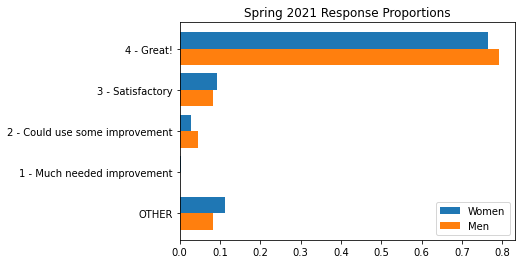

In [17]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

w_sp21_tot = sum(w_sp21_values)
m_sp21_tot = sum(m_sp21_values)

w_sp21_props = [x/w_sp21_tot for x in w_sp21_values]
m_sp21_props = [x/m_sp21_tot for x in m_sp21_values]

plt.barh(y_axis + 0.2, w_sp21_props, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_sp21_props, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Spring 2021 Response Proportions")

plt.show()

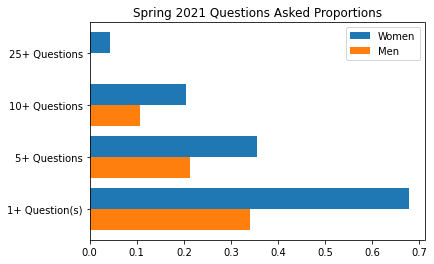

In [18]:
w_sp21_qs = {"1+ Question(s)" : 0, "5+ Questions" : 0, "10+ Questions" : 0, "25+ Questions" : 0}
m_sp21_qs = w_sp21_qs.copy()

all_sp21_qs = {"woman":w_sp21_qs, "man":m_sp21_qs}

sp21_anonids_counts = sp21_merged.groupby("anonid").count()

for anonID in sp21_anonids_counts.index:
    numQs = sp21_anonids_counts.at[anonID, "Gender Anon"]
    gender = sp21_demographics.set_index("anonid").at[anonID, "Gender Anon"]
    if gender not in ["man", "woman"]:
        continue
    prop = 1/gender_sp21[gender]
    
    all_sp21_qs[gender]["1+ Question(s)"] += prop
    
    if numQs >= 5:
        all_sp21_qs[gender]["5+ Questions"] += prop
    
    if numQs >= 10:
        all_sp21_qs[gender]["10+ Questions"] += prop
        
    if numQs >= 25:
        all_sp21_qs[gender]["25+ Questions"] += prop

y_axis = np.arange(len(w_sp21_qs))

plt.barh(y_axis + 0.2, w_sp21_qs.values(), height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_sp21_qs.values(), height=0.4,  label = "Men")

plt.yticks(y_axis, m_sp21_qs.keys())

plt.legend()

plt.title("Spring 2021 # of Questions Asked (proportions)")

plt.show()

In [19]:
feedback_m_fa21 = fa21_merged[fa21_merged["Gender Anon"] == "man"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()
feedback_w_fa21 = fa21_merged[fa21_merged["Gender Anon"] == "woman"].groupby(["studentFeedback_4 - Great!", "studentFeedback_3 - Satisfactory", "studentFeedback_2 - Could use some improvement", "studentFeedback_1 - Much needed improvement"])["anonid"].count()

In [20]:
m_fa21_values = feedback_m_fa21.values.tolist()
w_fa21_values = feedback_w_fa21.values.tolist()

print(m_fa21_values, w_fa21_values)

[31, 3, 8, 42, 178] [80, 13, 10, 53, 287]


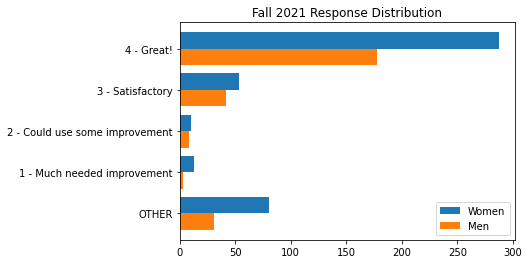

In [21]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

plt.barh(y_axis + 0.2, w_fa21_values, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa21_values, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Fall 2021 Response Distribution")

plt.show()

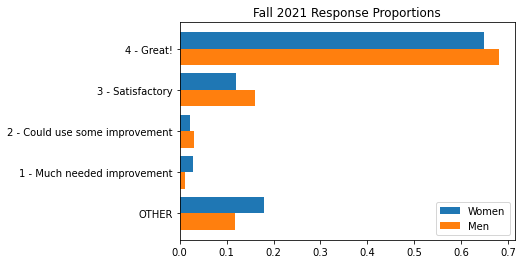

In [22]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

w_fa21_tot = sum(w_fa21_values)
m_fa21_tot = sum(m_fa21_values)

w_fa21_props = [x/w_fa21_tot for x in w_fa21_values]
m_fa21_props = [x/m_fa21_tot for x in m_fa21_values]

plt.barh(y_axis + 0.2, w_fa21_props, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa21_props, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Fall 2021 Response Proportions")

plt.show()

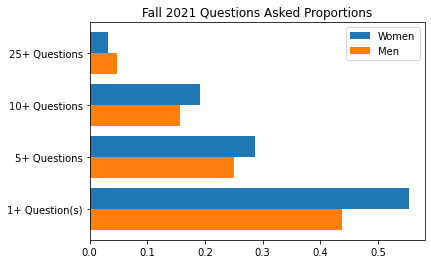

In [23]:
w_fa21_qs = {"1+ Question(s)" : 0, "5+ Questions" : 0, "10+ Questions" : 0, "25+ Questions" : 0}
m_fa21_qs = w_fa21_qs.copy()

all_fa21_qs = {"woman":w_fa21_qs, "man":m_fa21_qs}

fa21_anonids_counts = fa21_merged.groupby("anonid").count()

for anonID in fa21_anonids_counts.index:
    numQs = fa21_anonids_counts.at[anonID, "Gender Anon"]
    gender = fa21_demographics.set_index("anonid").at[anonID, "Gender Anon"]
    if gender not in ["man", "woman"]:
        continue
    prop = 1/gender_fa21[gender]
    
    all_fa21_qs[gender]["1+ Question(s)"] += prop
    
    if numQs >= 5:
        all_fa21_qs[gender]["5+ Questions"] += prop
    
    if numQs >= 10:
        all_fa21_qs[gender]["10+ Questions"] += prop
        
    if numQs >= 25:
        all_fa21_qs[gender]["25+ Questions"] += prop

y_axis = np.arange(len(w_fa21_qs))

plt.barh(y_axis + 0.2, w_fa21_qs.values(), height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_fa21_qs.values(), height=0.4,  label = "Men")

plt.yticks(y_axis, m_fa21_qs.keys())

plt.legend()

plt.title("Fall 2021 # of Questions Asked (proportions)")

plt.show()

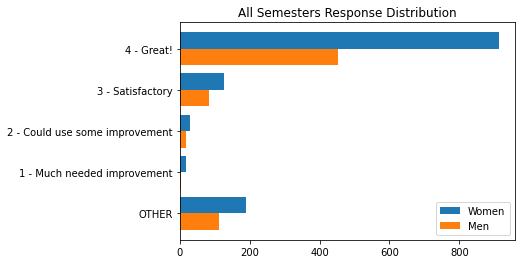

In [24]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

all_w_values = [w_fa20_values[i]+w_sp21_values[i]+w_fa21_values[i] for i in range(len(responses))]
all_m_values = [m_fa20_values[i]+m_sp21_values[i]+m_fa21_values[i] for i in range(len(responses))]

plt.barh(y_axis + 0.2, all_w_values, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, all_m_values, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("All Semesters Response Distribution")

plt.show()

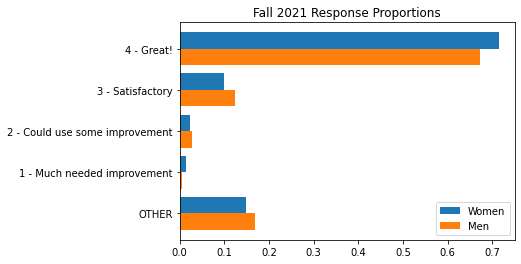

In [25]:
responses = ["OTHER", "1 - Much needed improvement", "2 - Could use some improvement", "3 - Satisfactory", "4 - Great!"]
y_axis = np.arange(len(responses))

w_all_tot = sum(all_w_values)
m_all_tot = sum(all_m_values)

w_all_props = [x/w_all_tot for x in all_w_values]
m_all_props = [x/m_all_tot for x in all_m_values]

plt.barh(y_axis + 0.2, w_all_props, height=0.4,  label = "Women")
plt.barh(y_axis - 0.2, m_all_props, height=0.4,  label = "Men")

plt.yticks(y_axis, responses)

plt.legend()

plt.title("Fall 2021 Response Proportions")

plt.show()